# 1. Apple Stock

In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
apple = pd.read_csv('../datasets/apple_1980_2014.csv')
apple.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45


In [3]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [5]:
apple.Date = pd.to_datetime(apple.Date)
apple.Date.tail()

8460   1980-12-18
8461   1980-12-17
8462   1980-12-16
8463   1980-12-15
8464   1980-12-12
Name: Date, dtype: datetime64[ns]

In [6]:
apple = apple.set_index('Date')
apple.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45


In [9]:
# is there any duplicate dates? NO
apple.index.is_unique

True

In [10]:
apple.sort_index(ascending=True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [11]:
# last business day of each month
apple_month = apple.resample('BM').mean()
apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


In [13]:
# days of data
(apple.index.max() - apple.index.min()).days

12261

In [14]:
# months of data
len(apple_month)

404

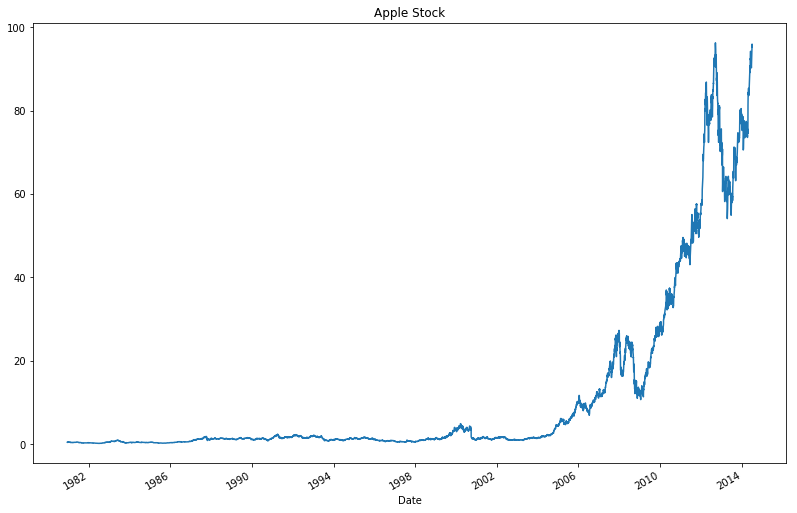

In [16]:
apple_open = apple['Adj Close'].plot(title='Apple Stock')
fig = apple_open.get_figure()
fig.set_size_inches(13.5, 9);

# 2. Getting Financial Data - Google Finance

In [24]:
import pandas as pd

# package to extract data from various Internet sources into a DataFrame
# make sure you have it installed
import pandas_datareader.data as web

# package for dates
import datetime as dt

In [34]:
start = dt.datetime(2015, 1, 1)

end = dt.datetime.today()

stocks = ['AAPL', 'TSLA', 'IBM']

df = web.DataReader(stocks, 'yahoo', start, end)
df

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 769 (major_axis) x 3 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2018-01-19 00:00:00 to 2014-12-31 00:00:00
Minor_axis axis: AAPL to TSLA

In [35]:
df.items

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [36]:
vol = df.Volume
vol.head()

,AAPL,IBM,TSLA
Date,,,
2018-01-19,31269600.0,21079500.0,4857200.0
2018-01-18,31193400.0,14259300.0,5685800.0
2018-01-17,34386800.0,11710000.0,7103500.0
2018-01-16,29565900.0,7794200.0,6474300.0
2018-01-12,25418100.0,5031900.0,4825100.0


In [37]:
vol['week'] = vol.index.week
vol['year'] = vol.index.year

week = vol.groupby(['week', 'year']).sum()
week.head()

AAPL         IBM        TSLA
week year                                     
1    2014   41403400.0   4011900.0   2402100.0
     2015   53204600.0   5525500.0   4764400.0
     2016  343790200.0  25253600.0  20975400.0
     2017  103845500.0  11943500.0  28576400.0
     2018  101168400.0  26396100.0  23411200.0

In [38]:
del vol['week']
vol['year'] = vol.index.year

year = vol.groupby('year').sum()
year

,AAPL,IBM,TSLA
year,,,
2014,4.140340e+07,4.011900e+06,2.402100e+06
2015,1.306315e+10,1.103814e+09,1.087621e+09
2016,9.680553e+09,1.016270e+09,1.161483e+09
2017,6.810036e+09,1.070962e+09,1.589877e+09
2018,3.377816e+08,1.038189e+08,8.031850e+07


# 3. Investor - Flow of Funds - US

In [40]:
url = 'https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv'
df = pd.read_csv(url)
df.tail()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
39,2015-03-11,3911,-7,3918,851,1298,999,298,6059
40,2015-03-18,1948,-1758,3706,912,452,258,194,3312
41,2015-03-25,-1167,-4478,3311,538,2404,1701,703,1775
42,2015-04-01,-1527,-3307,1780,720,-1296,-1392,96,-2103
43,2015-04-08,1906,-1321,3227,250,1719,1906,-187,3875


In [41]:
df = df.set_index('Date')
df.tail()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2015-03-11,3911,-7,3918,851,1298,999,298,6059
2015-03-18,1948,-1758,3706,912,452,258,194,3312
2015-03-25,-1167,-4478,3311,538,2404,1701,703,1775
2015-04-01,-1527,-3307,1780,720,-1296,-1392,96,-2103
2015-04-08,1906,-1321,3227,250,1719,1906,-187,3875


In [42]:
df.index

Index(['2012-12-05', '2012-12-12', '2012-12-19', '2012-12-26', '2013-01-02',
       '2013-01-09', '2014-04-02', '2014-04-09', '2014-04-16', '2014-04-23',
       '2014-04-30', '2014-05-07', '2014-05-14', '2014-05-21', '2014-05-28',
       '2014-06-04', '2014-06-11', '2014-06-18', '2014-06-25', '2014-07-02',
       '2014-07-09', '2014-07-30', '2014-08-06', '2014-08-13', '2014-08-20',
       '2014-08-27', '2014-09-03', '2014-09-10', '2014-11-05', '2014-11-12',
       '2014-11-19', '2014-11-25', '2015-01-07', '2015-01-14', '2015-01-21',
       '2015-01-28', '2015-02-04', '2015-02-11', '2015-03-04', '2015-03-11',
       '2015-03-18', '2015-03-25', '2015-04-01', '2015-04-08'],
      dtype='object', name='Date')

In [43]:
df.index = pd.to_datetime(df.index)
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [44]:
monthly = df.resample('M').sum()
monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156.0,-23126.0,-3031.0,526.0,9848.0,12613.0,-2765.0,-15782.0
2013-01-31,3661.0,-1627.0,5288.0,2730.0,12149.0,9414.0,2735.0,18540.0
2013-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
monthly = monthly.dropna()
monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156.0,-23126.0,-3031.0,526.0,9848.0,12613.0,-2765.0,-15782.0
2013-01-31,3661.0,-1627.0,5288.0,2730.0,12149.0,9414.0,2735.0,18540.0
2014-04-30,10842.0,1048.0,9794.0,4931.0,8493.0,7193.0,1300.0,24267.0
2014-05-31,-2203.0,-8720.0,6518.0,3172.0,13767.0,10192.0,3576.0,14736.0
2014-06-30,2319.0,-6546.0,8865.0,4588.0,9715.0,7551.0,2163.0,16621.0
2014-07-31,-7051.0,-11128.0,4078.0,2666.0,7506.0,7026.0,481.0,3122.0
2014-08-31,1943.0,-5508.0,7452.0,1885.0,1897.0,-1013.0,2910.0,5723.0
2014-09-30,-2767.0,-6596.0,3829.0,1599.0,3984.0,2479.0,1504.0,2816.0
2014-11-30,-2753.0,-7239.0,4485.0,729.0,14528.0,11566.0,2962.0,12502.0


In [46]:
year = monthly.resample('AS-JAN').sum()
year

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-01-01,-26156.0,-23126.0,-3031.0,526.0,9848.0,12613.0,-2765.0,-15782.0
2013-01-01,3661.0,-1627.0,5288.0,2730.0,12149.0,9414.0,2735.0,18540.0
2014-01-01,330.0,-44689.0,45021.0,19570.0,59890.0,44994.0,14896.0,79787.0
2015-01-01,15049.0,-10459.0,25508.0,7280.0,26028.0,17986.0,8041.0,48357.0
